In [1]:
import pandas as pd
heart= pd.read_csv('heart_failure.csv')

In [2]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart.dropna(inplace=True)

In [4]:
heart['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Analysis

In [26]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


Target variable with value 0 : 203
Target variable with value 1 : 96


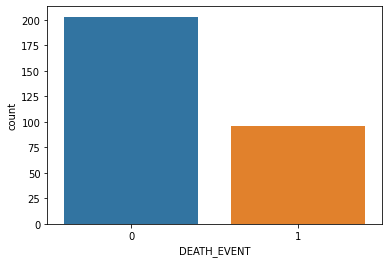

In [29]:
import seaborn as sns
sns.countplot(x = 'DEATH_EVENT',data = heart)
print("Target variable with value 0 : "+ format(len(heart.loc[heart['DEATH_EVENT']==0])))
print("Target variable with value 1 : "+ format(len(heart.loc[heart['DEATH_EVENT']==1])))

# Model Creation

In [6]:
X = heart.loc[:, heart.columns != 'DEATH_EVENT']
Y = heart['DEATH_EVENT'].values

In [7]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9016393442622951

# Model File

In [35]:
import joblib 
joblib.dump(model, 'model.pkl',compress=1)

['model.pkl']

In [39]:
#Sample prediction for Random Input
import numpy as np
load_model = joblib.load('model.pkl')
values = np.transpose(np.array([[65], [1], [113], [1], [60], [1], [203000], [0.9], [140],[0],[0],[94]]))
values.reshape(1, -1)
predictions = load_model.predict(values)

In [40]:
predictions

array([0])

# Model Comparison

In [30]:
def compare(model,classifier_name):
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print('Accuracy for '+ classifier_name +' : '+format(metrics.accuracy_score(Y_test,predictions)))

In [31]:
# List of models
models = [[RandomForestClassifier(), "Random Forest"],
[DecisionTreeClassifier(),"Decision Tree"],
[XGBClassifier(),"XGBoost Classifier"],
[SVC(),"Support Vector"],
[LogisticRegression(),"Logistic Regression"]]

for model in models:
    compare(model[0],model[1])

Accuracy for Random Forest : 0.9016393442622951
Accuracy for Decision Tree : 0.8360655737704918
Accuracy for XGBoost Classifier : 0.8770491803278688
Accuracy for Support Vector : 0.7131147540983607
Accuracy for Logistic Regression : 0.7377049180327869
